## Initilize Spark

In [0]:
import pyspark

## Load the data

In [0]:
df = sqlContext.sql("SELECT * FROM  spotify_csv")

In [0]:
df.count()

Out[122]: 32833

In [0]:
from pyspark.sql.types import StringType

In [0]:
type(df.schema[0].dataType)

Out[124]: pyspark.sql.types.StringType

In [0]:
str_cols = []
nstr_cols = []
for i in df.schema:
    if(isinstance(i.dataType, StringType)):
        str_cols.append(i.name)
    else:
        nstr_cols.append(i.name)

In [0]:
str_cols

Out[126]: ['track_id',
 'track_name',
 'track_artist',
 'track_album_id',
 'track_album_name',
 'playlist_name',
 'playlist_id',
 'playlist_genre',
 'playlist_subgenre']

In [0]:
str_cols = ['track_id',
 'track_artist',
 'track_album_id',
 'playlist_id',
 'playlist_genre',
 'playlist_subgenre']

In [0]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

indexer = StringIndexer(inputCol='satisfaction', outputCol='label')
index = indexer.fit(df)
df = index.transform(df)

In [0]:
for col in str_cols:
    print(col)

track_id
track_artist
track_album_id
playlist_id
playlist_genre
playlist_subgenre


In [0]:
ohe = []
indexer = []
encoder = []
final_data = df
for col in str_cols:
    output_ind = col + "Ind"
    indexer = StringIndexer(inputCol=col, outputCol=output_ind)
    final_data = indexer.fit(final_data).transform(final_data)

    output_vect = col + "Vec"
    encoder = OneHotEncoder(inputCol=output_ind, outputCol=output_vect)
    final_data = encoder.fit(final_data).transform(final_data)
    


In [0]:
final_data.columns

Out[131]: ['track_id',
 'track_name',
 'track_artist',
 'track_popularity',
 'track_album_id',
 'track_album_name',
 'track_album_release_date',
 'playlist_name',
 'playlist_id',
 'playlist_genre',
 'playlist_subgenre',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'track_idInd',
 'track_idVec',
 'track_artistInd',
 'track_artistVec',
 'track_album_idInd',
 'track_album_idVec',
 'playlist_idInd',
 'playlist_idVec',
 'playlist_genreInd',
 'playlist_genreVec',
 'playlist_subgenreInd',
 'playlist_subgenreVec']

## Create Feature Vector

In [0]:
col = [ 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'duration_ms',
 'track_idVec',
 'track_artistVec',
 'track_album_idVec',
 'playlist_idVec',
 'playlist_genreVec',
 'playlist_subgenreVec']

assembler = VectorAssembler(inputCols=col, outputCol="features")

In [0]:
final_data  = assembler.transform(final_data)

## StandardScaler

In [0]:
from pyspark.ml.feature import StandardScaler

In [0]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

In [0]:
scaler_model = scaler.fit(final_data)

In [0]:
final_data = scaler_model.transform(final_data)

# K means

In [0]:
from pyspark.ml.clustering import KMeans

In [0]:
from pyspark.ml.evaluation import ClusteringEvaluator

In [0]:

evaluator = ClusteringEvaluator()


In [0]:
silhouettes = []
for i in range(2, 8):
    kmeans = KMeans(featuresCol='features', k=i)
    model = kmeans.fit(final_data)
    prediction = model.transform(final_data)
    silhouette = evaluator.evaluate(prediction)
    silhouettes.append(silhouette)

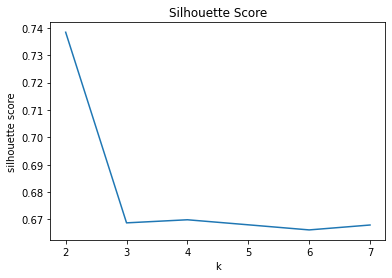

In [0]:
import matplotlib.pyplot as plt
  
plt.plot(range(2,8),silhouettes)
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.title('Silhouette Score')
plt.show()

In [0]:
print("k=3")

k=3
